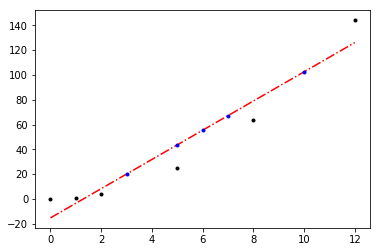

In [72]:
# coding:utf-8
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures


clf = linear_model.LinearRegression()

# 简单线性回归
# [0, 0], [1, 1], [2, 2], [3, 3], [6, 6]
x = [[0], [1], [2], [5], [8], [12]]
y = [0, 1, 4, 25, 64, 144]

clf.fit(x, y)
ret = clf.predict(x)

# plt.plot(x, y)  # 线条
plt.plot(x, y, 'k.')  # 黑色点数据集
plt.plot(x, ret, 'r-.')  # 红色虚线为线性回归算法根据数据集拟合的直线


x1 = [[3], [5], [6], [7], [10]]
ret1 = clf.predict(x1)
plt.plot(x1, ret1, 'b.')  # 蓝色点 

### 多元线性回归

In [44]:
x = [[0, 0], [1, 1], [2, 2], [5, 5], [8, 8], [12, 12]]
y = [0, 1, 4, 25, 64, 144]

clf = linear_model.LinearRegression()
clf.fit(x, y)
clf.predict([[6, 6], [10, 10]])

array([  55.36024845,  102.44099379])

### 多项式回归

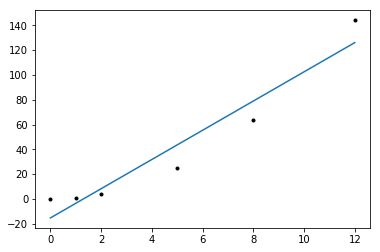

In [65]:
# 很多情况下都是非直线的
x = [[0], [1], [2], [5], [8], [12]]
y = [0, 1, 4, 25, 64, 144]
clf = linear_model.LinearRegression()
clf.fit(x, y)

plt.plot(x, y, 'k.')
plt.plot(x, clf.predict(x))   # 简单线性回归

array([[ 318.36669335],
       [ 326.37309848]])

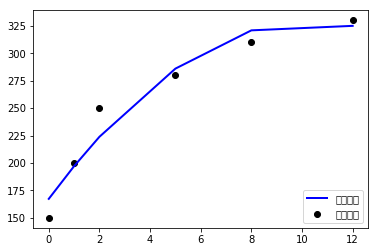

In [88]:
xx = np.array(x)
yy = np.array(y)

quadratic_featurizer = PolynomialFeatures(degree=2)
x_quadratic = quadratic_featurizer.fit_transform(x)

xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

clf = linear_model.LinearRegression()
clf.fit(x_quadratic, y)
# clf.predict(x_quadratic)

# clf.fit(xx)
plt.scatter(x, y, color='black', label=u'样本数据')
plt.plot(xx, clf.predict(xx_quadratic), 'r-',color='blue', label=u'拟合直线', linewidth=2)
plt.legend(loc='lower right')

new_x = np.array([[13], [9]])
new_quadratic = quadratic_featurizer.transform(new_x.reshape(new_x.shape[0], 1))
clf.predict(new_quadratic)

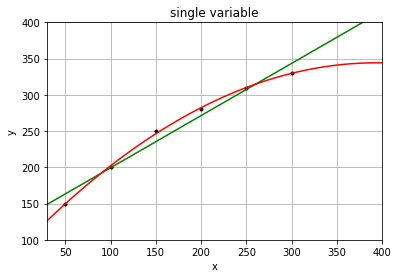

In [80]:
# coding:utf-8
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.figure() # 实例化作图变量
plt.title('single variable') # 图像标题
plt.xlabel('x') # x轴文本
plt.ylabel('y') # y轴文本
plt.axis([30, 400, 100, 400])
plt.grid(True) # 是否绘制网格线

X = [[50],[100],[150],[200],[250],[300]]
y = [[150],[200],[250],[280],[310],[330]]
X_test = [[250],[300]] # 用来做最终效果测试
y_test = [[310],[330]] # 用来做最终效果测试
plt.plot(X, y, 'k.')

model = LinearRegression()
model.fit(X, y)
X2 = [[30], [400]]
y2 = model.predict(X2)
plt.plot(X2, y2, 'g-')

xx = np.linspace(30, 400, 100) # 设计x轴一系列点作为画图的x点集
quadratic_featurizer = PolynomialFeatures(degree=2) # 实例化一个二次多项式特征实例
X_train_quadratic = quadratic_featurizer.fit_transform(X) # 用二次多项式对样本X值做变换
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1)) # 把训练好X值的多项式特征实例应用到一系列点上,形成矩阵
regressor_quadratic = LinearRegression() # 创建一个线性回归实例
regressor_quadratic.fit(X_train_quadratic, y) # 以多项式变换后的x值为输入，代入线性回归模型做训练
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-') # 用训练好的模型作图

# print '一元线性回归 r-squared', model.score(X_test, y_test)
# X_test_quadratic = quadratic_featurizer.transform(X_test)
# print '二次回归     r-squared', regressor_quadratic.score(X_test_quadratic, y_test)

# plt.show() # 展示图像